In [ ]:
pip install pandas openpyxl scikit-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_excel("advertising_sales_data.xlsx")

In [ ]:
# Question 1
average_tv = df['TV'].mean()
print("Average TV Advertising Cost:", average_tv)

Average TV Advertising Cost: 147.0425


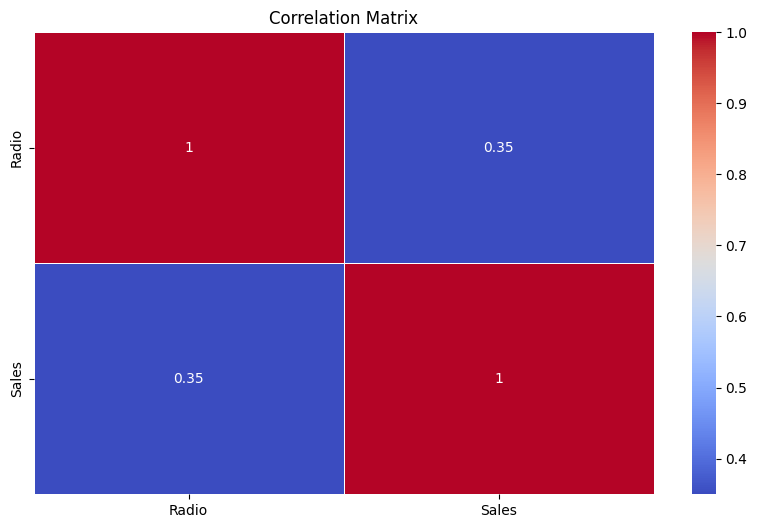


Interpretation and Conclusion : 
As the value of the Correlation coefficient between the variables Radio Expediture and  is 0.3497277129207838, it represents a Weak Correlation which suggests a faint relationship in the positive direction that might not be practically significant.


In [ ]:
# Question 2
df_select = df[['Radio','Sales']]
corr_matrix = df_select.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
print('\nInterpretation and Conclusion : ')
print(f'As the value of the Correlation coefficient between the variables Radio Expediture and  is {corr_matrix.loc["Radio","Sales"]}, it represents a Weak Correlation which suggests a faint relationship in the positive direction that might not be practically significant.')

In [ ]:
# Question 4
X = df.iloc[:, 1:4].values
# print(X)
y = df.iloc[:, -1].values
# print(y)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
# print(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

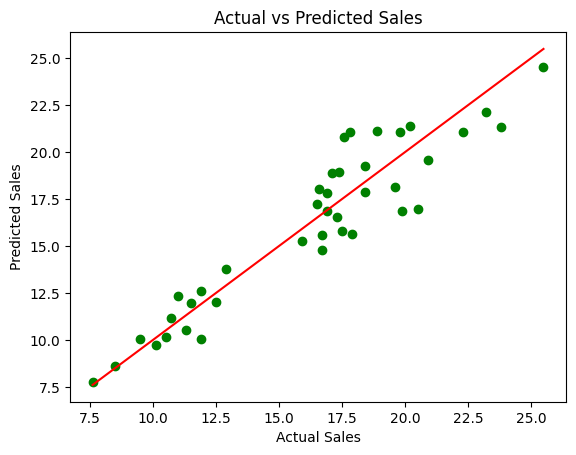

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Actual vs Predicted
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')  # Reference line y=x
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


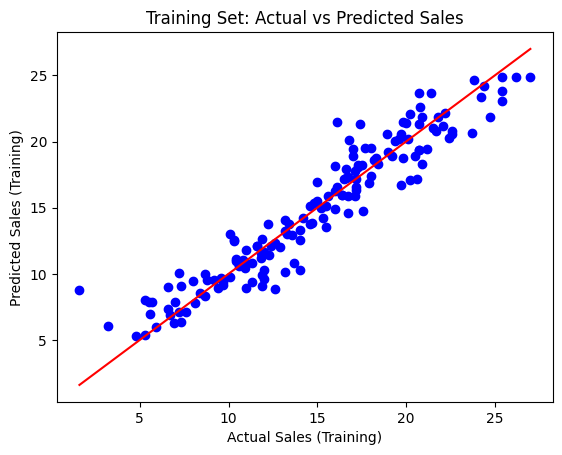

In [ ]:
y_train_pred = regressor.predict(X_train)

plt.scatter(y_train, y_train_pred, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r')
plt.xlabel('Actual Sales (Training)')
plt.ylabel('Predicted Sales (Training)')
plt.title('Training Set: Actual vs Predicted Sales')
plt.show()


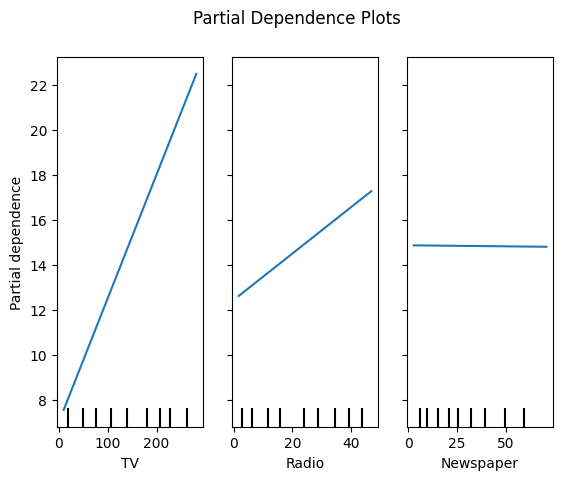

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Assume regressor is your trained model
# X_train is your training data (features)

features = [0, 1, 2]  # indices of your features: TV, Radio, Newspaper

PartialDependenceDisplay.from_estimator(regressor, X_train, features, feature_names=['TV', 'Radio', 'Newspaper'])
plt.suptitle('Partial Dependence Plots')
plt.show()


In [ ]:
# Question 3
features = ['TV', 'Radio', 'Newspaper']
coefficients = regressor.coef_

for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef:.4f}")
print(" ")
print("Clearly, we can see that the feature Radio has the highest coefficent of regression which implies that the Radio has the highest impact on sales based on the dataset.")

TV: 0.0551
Radio: 0.1031
Newspaper: -0.0009
 
Clearly, we can see that the feature Radio has the highest coefficent of regression which implies that the Radio has the highest impact on sales based on the dataset.


In [ ]:
# Question 5
# New data as a 2D array (one row, three features)
new_data = np.array([[200, 40, 50]])

# Predict sales using the trained model
predicted_sales = regressor.predict(new_data)

print(f"Predicted sales: {predicted_sales[0]:.3f}")

Predicted sales: 19.732


In [ ]:
# Question 6
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model on scaled data
regressor_scaled = LinearRegression()
regressor_scaled.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_scaled = regressor_scaled.predict(X_test_scaled)
print("R^2 score on test set (scaled):", r2_score(y_test, y_pred_scaled))
print("R^2 score on test set (unscaled):", r2_score(y_test, y_pred))

R^2 score on test set (scaled): 0.8747286106321063
R^2 score on test set (unscaled): 0.8747286106321062


In [ ]:
coefficients = regressor_scaled.coef_

for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef:.4f}")

TV: 4.8125
Radio: 1.5665
Newspaper: -0.0193


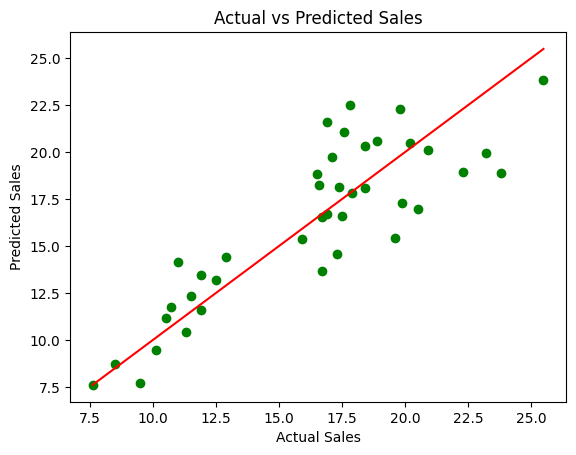

R^2 score on test set (reduced): 0.7261531414744891


In [ ]:
# Question 7
X_train_selected = X_train[:, [0, 2]]
X_test_selected = X_test[:, [0, 2]]

regressor_new = LinearRegression()
regressor_new.fit(X_train_selected, y_train)
y_pred_new = regressor_new.predict(X_test_selected)

# Actual vs Predicted
plt.scatter(y_test, y_pred_new, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')  # Reference line y=x
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()
print("R^2 score on test set (reduced):", r2_score(y_test, y_pred_new))